<a href="https://colab.research.google.com/github/aszenz/pytorch-DGAN/blob/master/Training_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training DCGAN

## Initial Setup

In [0]:
uname=!uname -a
os=!cat /etc/os-release
python_v=!python --version
cuda_v=!nvcc --version
print(os[:2])
print(uname)
print(python_v)
print(cuda_v)

['NAME="Ubuntu"', 'VERSION="18.04.1 LTS (Bionic Beaver)"']
['Linux 0a455080394e 4.14.65+ #1 SMP Sun Sep 9 02:18:33 PDT 2018 x86_64 x86_64 x86_64 GNU/Linux']
['Python 3.6.6']
['nvcc: NVIDIA (R) Cuda compiler driver', 'Copyright (c) 2005-2018 NVIDIA Corporation', 'Built on Tue_Jun_12_23:07:04_CDT_2018', 'Cuda compilation tools, release 9.2, V9.2.148']


In [0]:
# install latest version of pytorch and its dependencies
!pip3 install torch torchvision lxml Pillow

## Verify Setup

In [0]:
# verify pytorch is running and using gpu
import torch
x = torch.rand(2, 2)
print(x)
print('is gpu:', torch.cuda.is_available())

tensor([[0.0243, 0.0893],
        [0.3110, 0.3295]])
is gpu: True


## Download  and Extract Images from Facial Dataset

In [0]:
dataset_link = 'https://www.floydhub.com/api/v1/resources/kH4Tmy22D3AuQCAeuXhCF3?content=true&download=true&rename=udacity-datasets-celeba-1'
!curl '$dataset_link' -o celeb_dataset.tar 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1492M    0 1492M    0     0  37.3M      0 --:--:--  0:00:39 --:--:-- 38.3M


In [0]:
!mkdir train_data
!mkdir celeb_imgs
!tar -xf celeb_dataset.tar -C celeb_imgs
!mv celeb_imgs train_data

mkdir: cannot create directory ‘train_data’: File exists
mkdir: cannot create directory ‘celeb_imgs’: File exists


In [0]:
!ls train_data/celeb_imgs | head -5

000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg


## Download Training Code

In [0]:
pytorch_dcgan_link = 'https://raw.githubusercontent.com/pytorch/examples/master/dcgan/main.py'
!mkdir code
!curl '$pytorch_dcgan_link' -o code/main.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9524  100  9524    0     0  52043      0 --:--:-- --:--:-- --:--:-- 52043


## Execute Training Code

In [0]:
!mkdir training_checkpoints # will store model checkpoints and final generated image

In [0]:
"""
--dataroot - path to dataset
--niter - number of epochs to train for (takes more training time)
--cuda - enables cuda
--outf - folder to output images and model checkpoints
"""
!python3 code/main.py --cuda --dataset=folder --dataroot=train_data --niter=1 --outf=training_checkpoints

Namespace(batchSize=64, beta1=0.5, cuda=True, dataroot='train_data', dataset='folder', imageSize=64, lr=0.0002, manualSeed=None, ndf=64, netD='', netG='', ngf=64, ngpu=1, niter=1, nz=100, outf='training_checkpoints', workers=2)
Random Seed:  6193
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1

In [0]:
!ls training_checkpoints

fake_samples_epoch_000.png  netD_epoch_1.pth  netG_epoch_2.pth
fake_samples_epoch_001.png  netD_epoch_2.pth  netG_epoch_3.pth
fake_samples_epoch_002.png  netD_epoch_3.pth  netG_epoch_4.pth
fake_samples_epoch_003.png  netD_epoch_4.pth  netG_epoch_5.pth
fake_samples_epoch_004.png  netD_epoch_5.pth  netG_epoch_6.pth
fake_samples_epoch_005.png  netD_epoch_6.pth  netG_epoch_7.pth
fake_samples_epoch_006.png  netD_epoch_7.pth  netG_epoch_8.pth
fake_samples_epoch_007.png  netD_epoch_8.pth  netG_epoch_9.pth
fake_samples_epoch_008.png  netD_epoch_9.pth  real_samples.png
fake_samples_epoch_009.png  netG_epoch_0.pth
netD_epoch_0.pth	    netG_epoch_1.pth


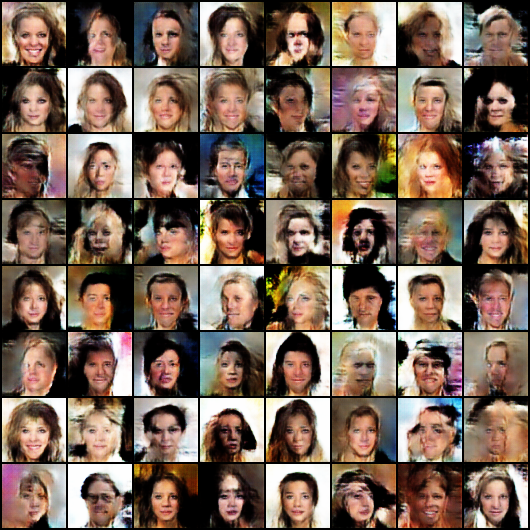

In [0]:
# display the generated fake images
from IPython.display import Image
Image('training_checkpoints/fake_samples_epoch_000.png')

## Generate Fake Images using the Trained Network

In [0]:
# download the code files
!curl https://raw.githubusercontent.com/aszenz/pytorch-DGAN/master/generate_fakes.py -o code/generate_fakes.py
!curl https://raw.githubusercontent.com/aszenz/pytorch-DGAN/master/generator.py -o code/generator.py  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1739  100  1739    0     0   7368      0 --:--:-- --:--:-- --:--:--  7368
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1323  100  1323    0     0   9251      0 --:--:-- --:--:-- --:--:--  9251


In [0]:
# pass the trained generator to this file to get fakes
!python code/generate_fakes.py --cuda --netG='./training_checkpoints/netG_epoch_0.pth'

Namespace(batchSize=64, cuda=True, display='1', imageSize=64, ndf=64, netG='./training_checkpoints/netG_epoch_0.pth', ngf=64, ngpu=1, nz=100, outImg='fake_sample.png')
Fake Images Generated


In [0]:
!ls .

celeb_dataset.tar  fake_sample.png  sample_data     train_data
code		   imgs		    scraped_images  training_checkpoints


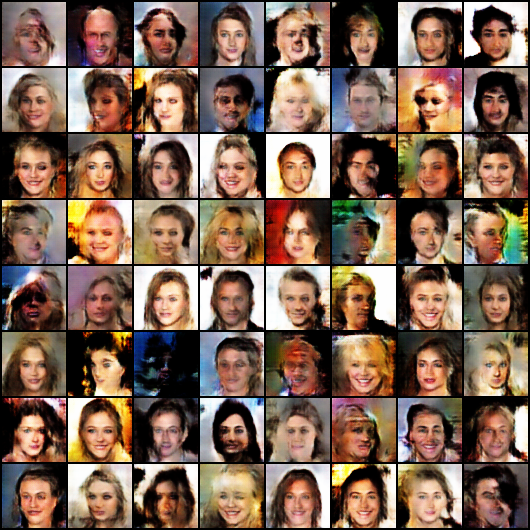

In [0]:
Image('fake_sample.png')